In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [2]:
data_set = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


In [3]:
print('size of train labels = ', data_set.train.labels.shape)
print('size of train data   = ', data_set.train.images.shape)
print('size of test labels  = ', data_set.test.labels.shape)
print('size of test data    = ', data_set.test.images.shape)


size of train labels =  (55000, 10)
size of train data   =  (55000, 784)
size of test labels  =  (10000, 10)
size of test data    =  (10000, 784)


In [4]:
label_dict= {
 0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
}

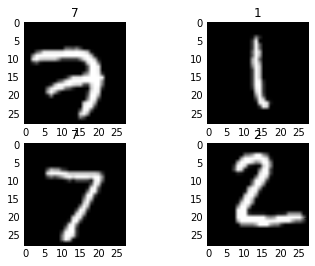

In [5]:
plt.figure()
plt.subplot(221)
img1 = np.reshape(data_set.train.images[0],[28,28])
lab1 = label_dict[np.argmax(data_set.train.labels[0])]
plt.imshow(img1, cmap='gray')
plt.title(lab1)
plt.subplot(222)
img2 = np.reshape(data_set.train.images[20],[28,28])
lab2 = label_dict[np.argmax(data_set.train.labels[20])]
plt.imshow(img2, cmap='gray')
plt.title(lab2)
plt.subplot(223)
img3 = np.reshape(data_set.test.images[0],[28,28])
lab3 = label_dict[np.argmax(data_set.test.labels[0])]
plt.imshow(img3, cmap='gray')
plt.title(lab3)
plt.subplot(224)
img4 = np.reshape(data_set.test.images[1],[28,28])
lab4 = label_dict[np.argmax(data_set.test.labels[1])]
plt.imshow(img4, cmap='gray')
plt.title(lab4)
plt.show()

In [6]:
print(data_set.train.images.shape)
print(data_set.train.images.reshape(-1, 28, 28, 1).shape)

(55000, 784)
(55000, 28, 28, 1)


In [7]:
train_x = data_set.train.images.reshape(-1,28,28,1)
test_x = data_set.test.images.reshape(-1,28,28,1)

In [8]:
train_y = data_set.train.labels
test_y = data_set.test.labels

In [9]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((55000, 28, 28, 1), (10000, 28, 28, 1), (55000, 10), (10000, 10))

In [10]:
train_iter = 150
learn_rate = .001
batch_size = 1

In [11]:
num_classes = train_y.shape[1]
img_dim = list(train_x.shape[1:])

In [12]:
x = tf.placeholder(tf.float32,[None]+img_dim)
y = tf.placeholder(tf.float32,[None,num_classes])

In [13]:
def conv_2d(image, kernel, bias, stride):
    x = tf.nn.conv2d(image,kernel,strides=[1,stride,stride,1],padding='SAME')
    x = tf.nn.bias_add(x,bias)
    x = tf.nn.relu(x)
    return x

In [14]:
def max_pool2d(x,pool_size,stride):
    x = tf.nn.max_pool(x,ksize=[1,pool_size,pool_size,1],strides=[1,stride,stride,1],padding='SAME')
    return x

In [15]:
weights = {'conv1': tf.get_variable('wc1',shape=(3,3,1,32),initializer=tf.contrib.layers.xavier_initializer()),
           'conv2': tf.get_variable('wc2',shape=(3,3,32,68),initializer=tf.contrib.layers.xavier_initializer()),
           'conv3': tf.get_variable('wc3',shape=(3,3,68,128),initializer=tf.contrib.layers.xavier_initializer()),
           'dense': tf.get_variable('wd1',shape=(4*4*128,128),initializer=tf.contrib.layers.xavier_initializer()),
           'out': tf.get_variable('wo',shape=(128,10),initializer=tf.contrib.layers.xavier_initializer())}

In [16]:
bias = {'conv1': tf.get_variable('bc1',shape=(32),initializer=tf.contrib.layers.xavier_initializer()),
        'conv2': tf.get_variable('bc2',shape=(68),initializer=tf.contrib.layers.xavier_initializer()),
        'conv3': tf.get_variable('bc3',shape=(128),initializer=tf.contrib.layers.xavier_initializer()),
        'dense': tf.get_variable('bd1',shape=(128),initializer=tf.contrib.layers.xavier_initializer()),
        'out': tf.get_variable('b0',shape=(10),initializer=tf.contrib.layers.xavier_initializer())}

In [17]:
def network(image, weights, bias):
    tf.logging.error("helloooo")
    
    conv1 = conv_2d(image,weights['conv1'],bias['conv1'],1)
    conv1 = max_pool2d(conv1,2,2)

    conv2 = conv_2d(conv1,weights['conv2'],bias['conv2'],1)
    conv2 = max_pool2d(conv2,2,2)

    conv3 = conv_2d(conv2,weights['conv3'],bias['conv3'],1)
    conv3 = max_pool2d(conv3,2,2)
    

    fc = tf.reshape(conv3, [-1, weights['dense'].shape[0]])

    fc = tf.add(tf.matmul(fc,weights['dense']),bias['dense'])
    fc = tf.nn.relu(fc)

    out = tf.add(tf.matmul(fc,weights['out']),bias['out'])
    return out

In [18]:
prediction = network(x,weights,bias)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate).minimize(cost)

In [19]:
correct_prediction = tf.equal(tf.arg_max(prediction, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [ ]:
init_gvars = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init_gvars)
    test_cost_list = []
    test_accr_list = []
    train_cost_list = []
    train_accr_list = []
    for i in range(train_iter):
        for batch in range(len(train_x)//batch_size):
            batch_x = train_x[batch*batch_size:min((batch+1)*batch_size, len(train_x))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size, len(train_y))]
            o = sess.run(optimizer,feed_dict={x:batch_x,y:batch_y})
            [batch_cost, batch_accuracy] = sess.run([cost, accuracy],feed_dict={x:batch_x,y:batch_y})
            print("for iteration {}: batch_cost={:.6f}, batch_accuracy= {:.5f}".format(i,batch_cost,batch_accuracy))
        [test_cost, test_accuracy] = sess.run([cost, accuracy],feed_dict={x:test_x,y:test_y})
        print("for iteration {}: test_cost={:.6f}, test_accuracy= {:.5f}".format(i,test_cost,test_accuracy))
        test_cost_list.append(test_cost)
        test_accr_list.append(test_accuracy)
        train_cost_list.append(batch_cost)
        train_accr_list.append(batch_accuracy)      
        
              